### Load and split the dataset
- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.
- Separate the features and target and then split the train data into train and validation set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Code starts here

# read the dataset
train_data = pd.read_csv('train.csv')
train_data.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,8,155.8800,202,2469,4.7,1,4.9,9,4.7,7,0
1,26,19.9900,9,252,4.8,0,4.6,39,4.6,20,1
2,26,91.6980,56,659,4.6,0,4.6,34,3.9,4,2
3,11,24.3878,1,19,3.0,5,4.0,13,4.0,10,3
4,7,609.9878,84,4016,4.5,1,3.9,34,3.5,10,4


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 11 columns):
ages                 8582 non-null int64
list_price           8582 non-null float64
num_reviews          8582 non-null int64
piece_count          8582 non-null int64
play_star_rating     8582 non-null float64
review_difficulty    8582 non-null int64
star_rating          8582 non-null float64
theme_name           8582 non-null int64
val_star_rating      8582 non-null float64
country              8582 non-null int64
Id                   8582 non-null int64
dtypes: float64(4), int64(7)
memory usage: 737.6 KB


In [4]:
train_data.describe()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
count,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000,8582.000000
mean,16.649149,64.493463,14.680727,486.677464,3.697809,1.994640,3.904649,20.482172,3.597448,10.045211,4290.500000
std,8.186261,89.871631,34.867561,802.789725,1.653742,1.792387,1.617678,11.948618,1.624698,6.191468,2477.554338
min,0.000000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,19.990000,1.000000,95.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000,2145.250000
50%,19.000000,36.587800,4.000000,214.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000,4290.500000
75%,23.000000,71.298000,12.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000,6435.750000
max,30.000000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000,8581.000000


In [5]:
# Store independent variable_train
X = train_data.drop('list_price',axis=1)

In [6]:
# Store dependent variable
y = train_data['list_price']

In [7]:
# Spliting the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=6)

### Data Visualization

- All the features including target variable are continuous. 
- Check out the best plots for plotting between continuous features and try making some inferences from these plots. 

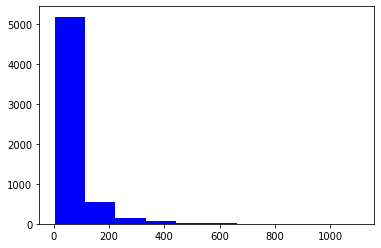

In [8]:
# Check if the target variable is normally distributed
plt.hist(y_train, color='blue');

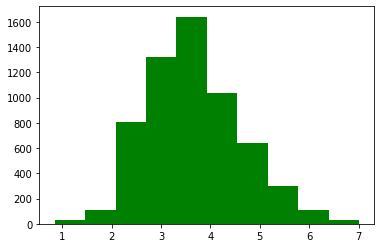

In [9]:
# Since the target variable is right skewed, we will tranform it using logarithmic transformation to normalize it
plt.hist(np.log(y_train), color='green');

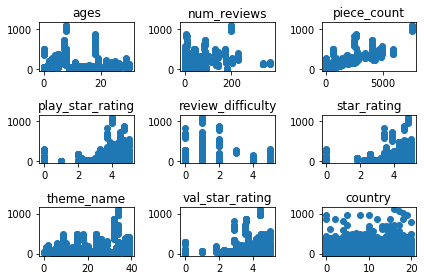

In [10]:
# Check if there is a linear relationship between dependent and independent variable

cols = X_train.columns
fig, axes = plt.subplots(nrows = 3 , ncols = 3)

for i in range(3):
    for j in range(3):
        col = cols[i*3 + j]
        axes[i,j].scatter(X_train[col], y_train)
        axes[i,j].set_title(col)

plt.tight_layout()
plt.show()

In [11]:
# Check for no or less multi-collinearity between dependent variables
corr = round(X_train.corr(), 2)
print(corr)

                   ages  num_reviews  piece_count  play_star_rating  \
ages               1.00        -0.16        -0.09              0.23   
num_reviews       -0.16         1.00         0.55              0.15   
piece_count       -0.09         0.55         1.00              0.17   
play_star_rating   0.23         0.15         0.17              1.00   
review_difficulty -0.25        -0.20        -0.31             -0.67   
star_rating        0.10         0.16         0.18              0.90   
theme_name         0.48         0.02         0.17              0.15   
val_star_rating    0.12         0.17         0.19              0.92   
country           -0.02         0.01         0.01             -0.00   
Id                 0.01        -0.01        -0.01             -0.01   

                   review_difficulty  star_rating  theme_name  \
ages                           -0.25         0.10        0.48   
num_reviews                    -0.20         0.16        0.02   
piece_count            

### Feature Selection
- Try selecting suitable threshold and accordingly drop the columns.

In [12]:
# selecting threshold  for correlation as 0.7
# drop columns from X_train
X_train.drop(['play_star_rating','val_star_rating', 'Id'],axis = 1 ,inplace=True)

In [13]:
X_val.drop(['play_star_rating','val_star_rating', 'Id'],axis = 1 ,inplace=True)

### Model building

In [14]:
# instantiate linear regression model
regressor = LinearRegression()

# fit model on training data
regressor.fit(X_train, y_train)

# predict the result
y_pred = regressor.predict(X_val)

### Residual check!

- Check the distribution of the residual.

Root Mean Squared Error: 48.84276343718057
R Squared: 0.7328


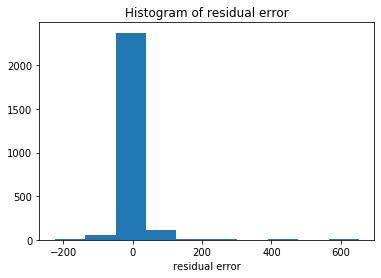

In [15]:
# RMSE calculation
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print("Root Mean Squared Error:", rmse)

# R-squared calculation
rsquared = r2_score(y_val, y_pred)
print("R Squared:", round(rsquared,4))

# Residual Check
residual = y_val-y_pred
plt.hist(residual)
plt.xlabel('residual error')
plt.title('Histogram of residual error')
plt.show()

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [16]:
# read the dataset
test_data = pd.read_csv('test.csv')
test_data.head()

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,Id
0,26,8,941,4.6,0,4.6,33,4.3,16,9907
1,11,0,19,0.0,5,0.0,13,0.0,7,5243
2,29,34,1376,4.0,1,4.3,34,3.8,12,8276
3,26,0,369,0.0,5,0.0,28,0.0,9,6501
4,11,1,19,3.0,5,4.0,13,4.0,0,1619


In [17]:
# Store independent variable_train
X_test = test_data

# Store dependent variable
#y_test = test_data['list_price']

In [18]:
ID = X_test['Id']

In [19]:
# drop columns from X_train
X_test.drop(['play_star_rating','val_star_rating', 'Id'],axis = 1 ,inplace=True)

In [20]:
X_test.columns

Index(['ages', 'num_reviews', 'piece_count', 'review_difficulty',
       'star_rating', 'theme_name', 'country'],
      dtype='object')

In [21]:
# predict the result
y_pred_test = regressor.predict(X_test)

In [32]:
y_pred_test = pd.Series(y_pred_test, name='list_price')

In [37]:
submission = pd.DataFrame({'Id':ID, 'list_price':y_pred_test})

In [40]:
submission.set_index('Id',inplace=True)

In [41]:
submission.to_csv('submit.csv')